<a href="https://colab.research.google.com/gist/MurphLaws/c6246a5b145ee21df9af29c83ecbfd92/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP: Machine Learning (SIA_3611)

## TP1: Linear Regression (4h)

by Clément Bouvier

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

**TO DO 1.1**

Execute the following cells

In [86]:
a = 3
b = 4
c = a + b


In [87]:
c = c

In [88]:
print(c)

7


In [89]:
c

7

**QUESTION 1**

What is triggering the output display?


**Answer:**

El valor de InteractiveShell.ast_node_interactivity establece que nodos u operacioens dentro del notebook se ejecutan interactivamente, el valor default es "last_exp", pero puede ser "all" o "none"

**TO DO 1.2**

Execute the following cells

In [90]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [91]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
__future__                    | /home/codespace/.python/current/lib/python3.10
_aix_support                  | /home/codespace/.python/current/lib/python3.10
_bootsubprocess               | /home/codespace/.python/current/lib/python3.10
_collections_abc              | /home/codespace/.python/current/lib/python3.10
_compat_pickle                | /home/codespace/.python/current/lib/python3.10
_compression                  | /home/codespace/.python/current/lib/python3.10
_markupbase                   | /home/codespace/.python/current/lib/python3.10
_osx_support                  | /home/codespace/.python/current/lib/python3.10
_py_abc                       | /home/codespace/.python/current/lib/python3.10
_pydecimal                    | /ho

**QUESTION 2**

**What is displayed on the last output?**

The method defined lists and displays the available Python modules and their file locations in the current Python environment.

**Which is the used Python version?**

Python 3.10

For this TP1, you will need:
- pandas
- matplotlib
- numpy
- sklearn

**Are these packages installed in this environment?**


In [92]:
!pip3 install scikit-learn seaborn

**TO DO 1.3**

Execute the following cell

In [93]:
import pandas


pandas.__version__


#pd.__version__
#In case pandas is not installed, we'll get the same error, and executing "!pip install pandas" should work for this and the other libraries on the list

'2.1.0'

**QUESTION 3**

How would you solve this error?

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

**QUESTION 4**

Can you explain the different elements printed on the last output?

In [95]:
from IPython.display import display

df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)


df1:      Country  Longitude  Latitude Continent  Year      Status  Life_expectancy  \
931  France  -2.761729  42.17344    Europe  2014  Developing             82.2   
932  France  -2.761729  42.17344    Europe  2013  Developing             82.0   
933  France  -2.761729  42.17344    Europe  2012  Developing             81.5   
934  France  -2.761729  42.17344    Europe  2011  Developing             81.7   

     Adult_mortality  Infant_deaths  Alcohol  ...  Polio  Total_expenditure  \
931             79.0              3     11.5  ...   98.0              11.54   
932             81.0              3     11.1  ...   99.0              11.56   
933             83.0              3     11.5  ...   99.0              11.44   
934             83.0              3     11.8  ...   99.0              11.33   

     Diphtheria  HIV_AIDS          GDP  Population  Thinness _1-19_years  \
931        98.0       0.1  42955.24287  66331957.0                   0.6   
932        99.0       0.1  42554.12250  

**QUESTION 5**

How do you interpret the new Data Frame df1 compared to df? What represents df2 compared to df1?

**TO CODE 2.2**

What is the range of life expectancy of Belgium between 2004 and 2008?

In [96]:
life_belgium_df = df[df.Country=="Belgium"].Life_expectancy


print(min(life_belgium_df),"-",max(life_belgium_df))

77.6 - 89.0


**TO DO 2.3**

Compute the correlation among all features

In [97]:
df.corr(numeric_only=True)['Life_expectancy']#.sort_values(ascending=False)

Longitude                         -0.192675
Latitude                           0.432515
Year                               0.050771
Life_expectancy                    1.000000
Adult_mortality                   -0.702523
Infant_deaths                     -0.169074
Alcohol                            0.402718
Percentage_expenditure             0.409631
Hepatitis_B                        0.199935
Measles                           -0.068881
BMI                                0.542042
Under-five_deaths                 -0.192265
Polio                              0.327294
Total_expenditure                  0.174718
Diphtheria                         0.341331
HIV_AIDS                          -0.592236
GDP                                0.441322
Population                        -0.022305
Thinness _1-19_years              -0.457838
Thinness_5-9_years                -0.457508
Income_composition_of_resources    0.721083
Schooling                          0.727630
Name: Life_expectancy, dtype: fl

<Axes: >

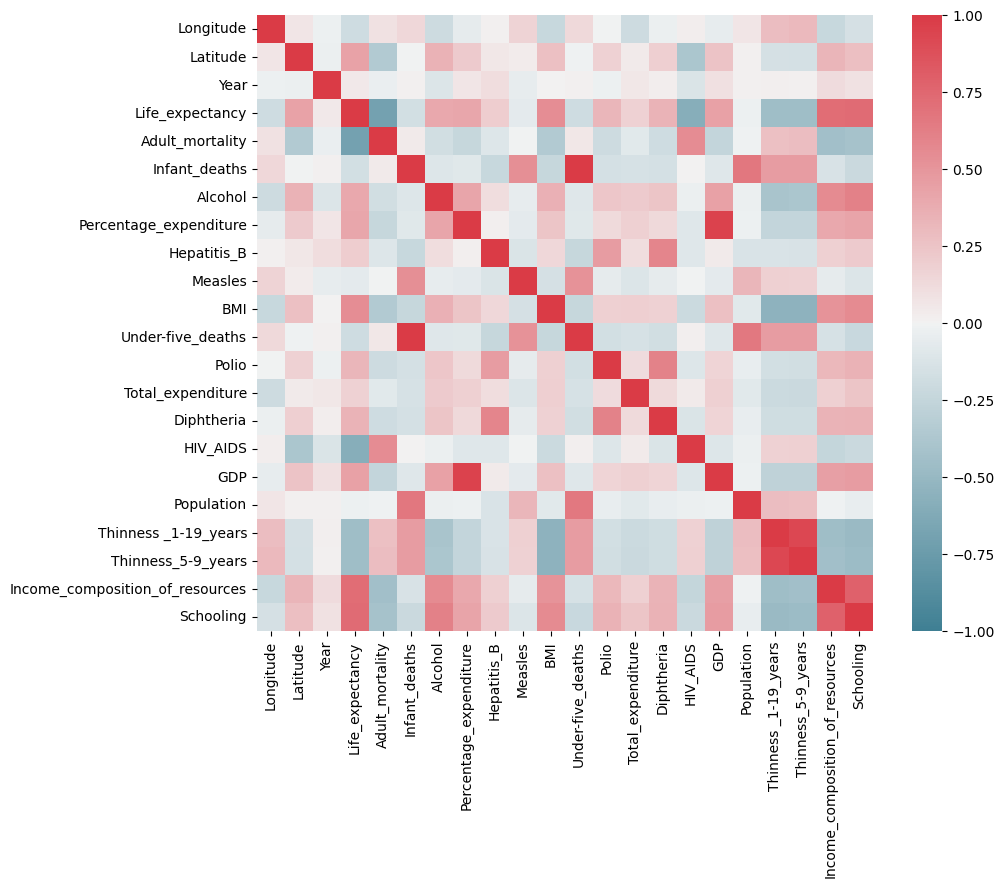

In [98]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

**QUESTION 6**

Which seems the most and the least promising values to use as a predictor for life expectancy?

The function scatter of matplotlib allows to plot two values against each other. Here is the documentation about this function:

```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
Parameters:

**x, y** float or array-like, shape (n, )

The data positions.

**s** float or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

**c** array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

- A 2D array in which the rows are RGB or RGBA.

- A sequence of colors of length n.

- A single color format string.

**marker** MarkerStyle, default: rcParams (default: 'o')

The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

**cmapstr** or Colormap, default: rcParams(default: 'viridis')

A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**norm** Normalize, default: None

If c is an array of floats, norm is used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap. If None, use the default colors.Normalize.

**vmin, vmax** float, default: None

vmin and vmax are used in conjunction with the default norm to map the color array c to the colormap cmap. If None, the respective min and max of the color array is used. It is deprecated to use vmin/vmax when norm is given.

**alpha** float, default: None

The alpha blending value, between 0 (transparent) and 1 (opaque).

**linewidths** float or array-like, default: rcParams (default: 1.5)

The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

**edgecolors** {'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')

The edge color of the marker. Possible values:

- 'face': The edge color will always be the same as the face color.

- 'none': No patch boundary will be drawn.
        
- A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

**plotnonfinite** bool, default: False

Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).


**TO CODE 2.4**

Plot life expectancy against one of your chosen values.

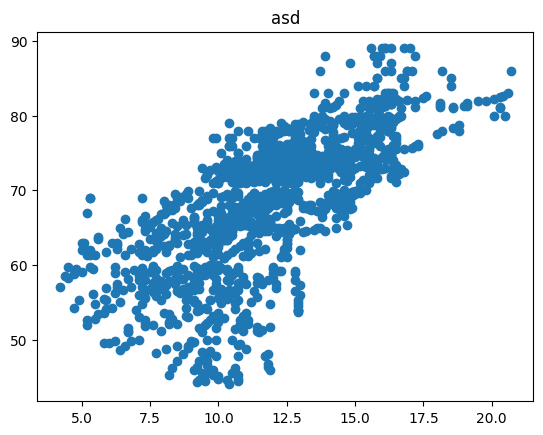

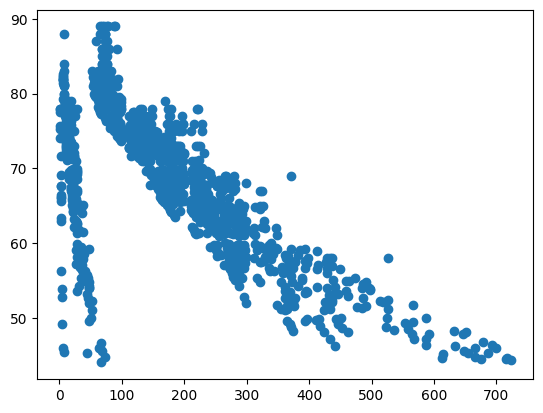

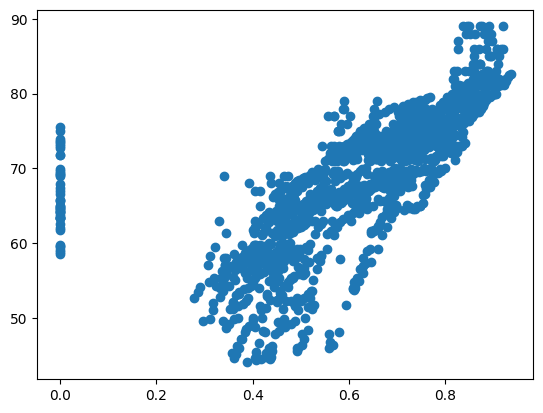

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df.Schooling,df.Life_expectancy)
plt.title("asd")
plt.show()
plt.scatter(df.Adult_mortality,df.Life_expectancy)
plt.show()
plt.scatter(df.Income_composition_of_resources,df.Life_expectancy)
plt.show()

## STEP 3: Simple Linear Regression

In [100]:
import numpy as np

**TO CODE 3.1**

Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [113]:

countries = ["Madagascar", "India", "Lithuania", "Belarus"]
df_study = df[(df.Country == "Madagascar") | (df.Country == "Belarus") | (df.Country == "India") | (df.Country == "Lithuania")][["Country","Income_composition_of_resources","Life_expectancy"]]

df_study


,Country,Income_composition_of_resources,Life_expectancy
225,Belarus,0.796,72.0
226,Belarus,0.796,71.7
227,Belarus,0.793,71.9
228,Belarus,0.787,72.0
229,Belarus,0.780,73.0
230,Belarus,0.771,70.0
231,Belarus,0.755,70.0
232,Belarus,0.739,69.8
233,Belarus,0.723,68.9
234,Belarus,0.713,68.1


**TO CODE 3.2**

Implement a simple least square function and apply it on the previous selected data.

In [121]:


def least_squares(df):
    x = df.Income_composition_of_resources
    y = df.Life_expectancy
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_diff = y - y_mean
    x_diff_sq = x_diff**2
    x_diff_y_diff = x_diff*y_diff
    b = np.sum(x_diff_y_diff)/np.sum(x_diff_sq)
    a = y_mean - b*x_mean
    return a, b

a, b = least_squares(df_study)
print("a: ", a)
print("b: ", b)



a:  49.34763518833232
b:  28.5982261406769


**TO CODE 3.3**

On the same figure, draw the line corresponding to your regression and the data points corresponding to df_study

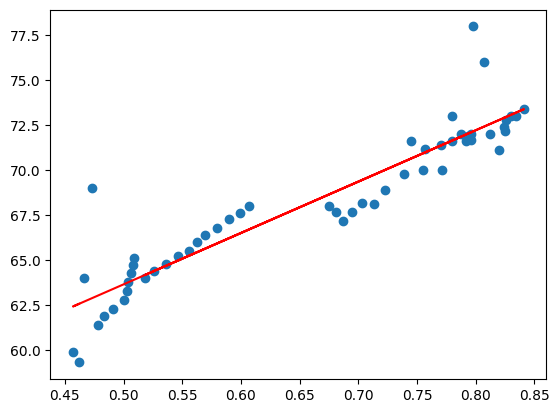

In [118]:

plt.scatter(df_study.Income_composition_of_resources,df_study.Life_expectancy)
plt.plot(df_study.Income_composition_of_resources, a + b*df_study.Income_composition_of_resources, color='red')
plt.show()

**TO CODE 3.4**

Now, implement a Gradient Descend function `def gradDescent(x, y, theta, alpha, iters)` where `x` are
the covariates, `y` the target value, `theta` the initial weights, `alpha` the learning rate and `iters` the number
of gradient descent iterations. Your function should return all intermediary values of `theta` that has been computed as a list.

In [130]:


def gradDescent(x, y, theta , alpha, iters):
    m = len(y)
    thetaList = []
    for i in range(iters):
        theta = theta - alpha * (1/m) * np.dot(x.T, (np.dot(x, theta) - y))
        thetaList.append(theta)
    return thetaList

#https://frickp.github.io/matrix-gradient-descent.html



**TO CODE 3.5**

Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [131]:


x = df_study.Income_composition_of_resources
y = df_study.Life_expectancy
x = np.c_[np.ones(x.shape[0]), x]

print(x)
theta = np.array([0, 1])
alpha = 0.01
iters = 1000

thetaList = gradDescent(x, y, theta, alpha, iters)
thetaList

[[1.    0.796]
 [1.    0.796]
 [1.    0.793]
 [1.    0.787]
 [1.    0.78 ]
 [1.    0.771]
 [1.    0.755]
 [1.    0.739]
 [1.    0.723]
 [1.    0.713]
 [1.    0.703]
 [1.    0.695]
 [1.    0.687]
 [1.    0.681]
 [1.    0.675]
 [1.    0.607]
 [1.    0.599]
 [1.    0.59 ]
 [1.    0.58 ]
 [1.    0.569]
 [1.    0.563]
 [1.    0.556]
 [1.    0.546]
 [1.    0.536]
 [1.    0.526]
 [1.    0.518]
 [1.    0.841]
 [1.    0.834]
 [1.    0.83 ]
 [1.    0.826]
 [1.    0.824]
 [1.    0.825]
 [1.    0.82 ]
 [1.    0.812]
 [1.    0.807]
 [1.    0.798]
 [1.    0.792]
 [1.    0.78 ]
 [1.    0.77 ]
 [1.    0.757]
 [1.    0.745]
 [1.    0.509]
 [1.    0.508]
 [1.    0.506]
 [1.    0.504]
 [1.    0.503]
 [1.    0.5  ]
 [1.    0.491]
 [1.    0.483]
 [1.    0.478]
 [1.    0.473]
 [1.    0.466]
 [1.    0.457]
 [1.    0.462]]


[array([0.67585463, 1.45148559]),
 array([1.34196715, 1.89645378]),
 array([1.99847804, 2.33499857]),
 array([2.64552577, 2.76721259]),
 array([3.28324681, 3.19318713]),
 array([3.91177566, 3.61301218]),
 array([4.53124488, 4.02677642]),
 array([5.14178511, 4.43456725]),
 array([5.74352513, 4.83647081]),
 array([6.33659183, 5.23257201]),
 array([6.92111029, 5.62295453]),
 array([7.4972038 , 6.00770082]),
 array([8.06499383, 6.38689218]),
 array([8.62460014, 6.76060871]),
 array([9.17614075, 7.12892936]),
 array([9.71973196, 7.49193195]),
 array([10.25548842,  7.84969317]),
 array([10.78352311,  8.20228861]),
 array([11.30394739,  8.54979277]),
 array([11.816871  ,  8.89227906]),
 array([12.3224021 ,  9.22981985]),
 array([12.82064732,  9.56248646]),
 array([13.31171171,  9.89034918]),
 array([13.79569883, 10.21347728]),
 array([14.27271075, 10.53193906]),
 array([14.74284804, 10.84580179]),
 array([15.20620985, 11.15513181]),
 array([15.66289388, 11.45999448]),
 array([16.11299644, 11.

**TO CODE 3.6**

On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

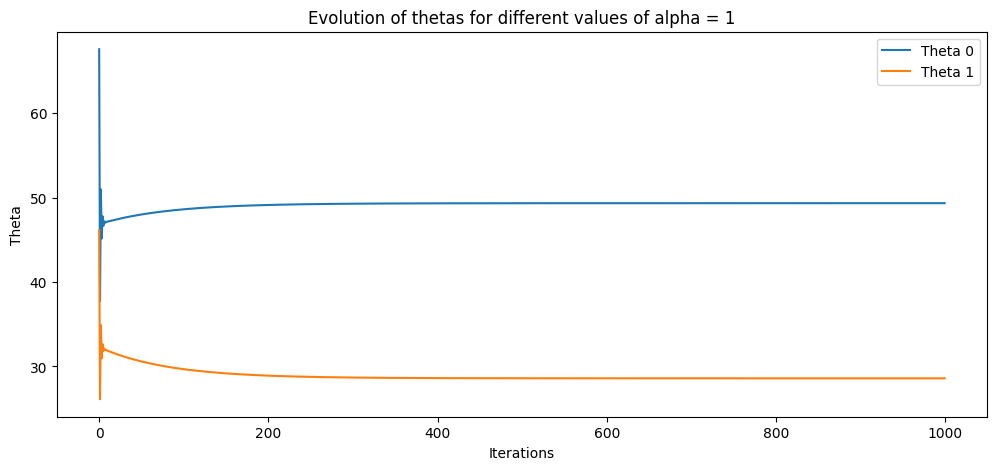

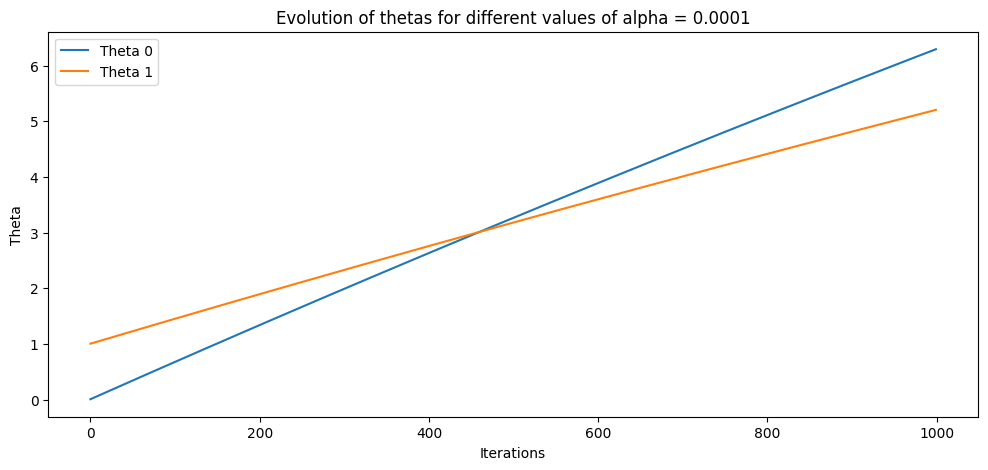

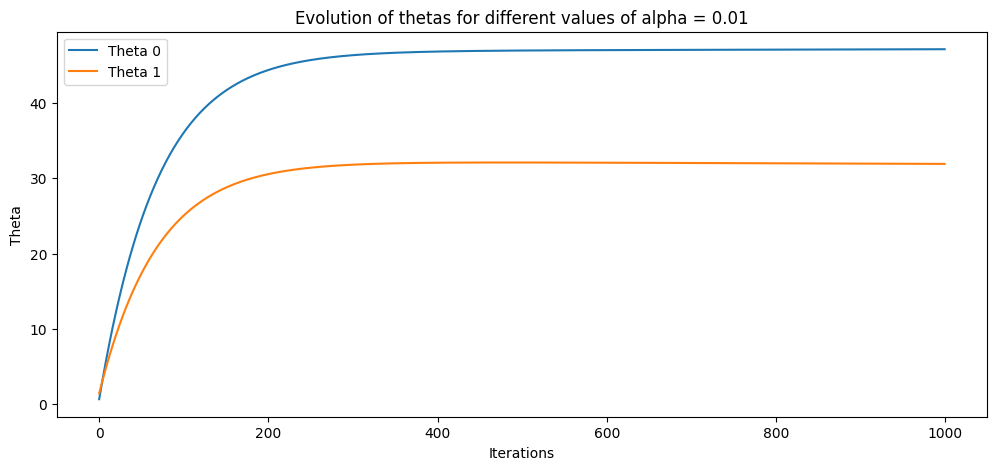

In [106]:

thetaList_00001 = gradDescent(x, y, theta, 0.0001, iters)
thetaList_001 = gradDescent(x, y, theta, 0.01, iters)
thetaList_1 = gradDescent(x, y, theta, 1, iters)



plt.figure(figsize=(12,5))
plt.plot(thetaList_1)
plt.title("Evolution of thetas for different values of alpha = 1")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])


plt.figure(figsize=(12,5))
plt.plot(thetaList_00001)
plt.title("Evolution of thetas for different values of alpha = 0.0001")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])


plt.figure(figsize=(12,5))
plt.plot(thetaList_001)
plt.title("Evolution of thetas for different values of alpha = 0.01")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])






### STEP 3.2: Simple Linear Regression with a negatively correlated variable (Extra)



**Question 7**

Discuss on the role of alpha

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [108]:
from sklearn.metrics import r2_score

**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

In [109]:

#Compute r2_score on the regression with df_study

intercept = thetaList_001[-1][0]
slope = thetaList_001[-1][1]
x = df_study.Income_composition_of_resources

y_pred = intercept + slope*x


r2_score(df_study.Life_expectancy, y_pred)


0.8352402625981873

**QUESTION 8**

Is linear regression suited between the two selected variables?

**QUESTION 9**

If not, what would be the relevant regression between these two variables?

a:  70.23729960360978
b:  -0.011464510406795421


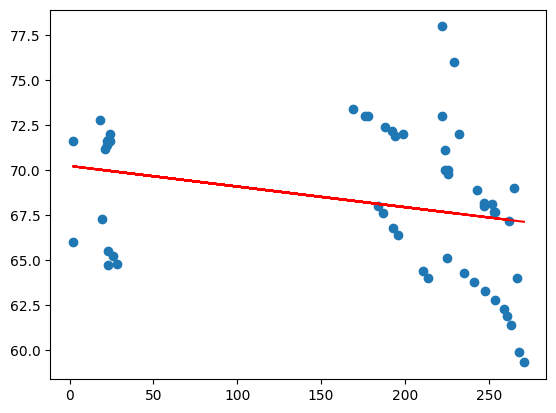

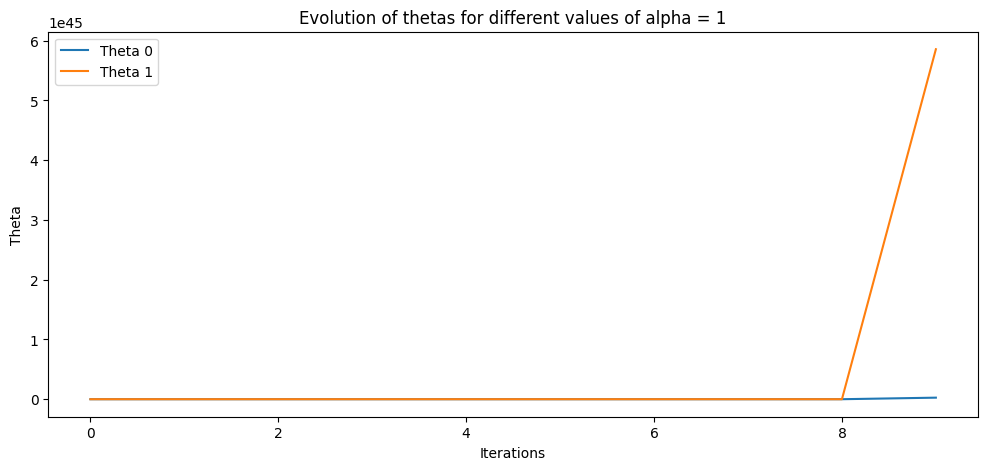

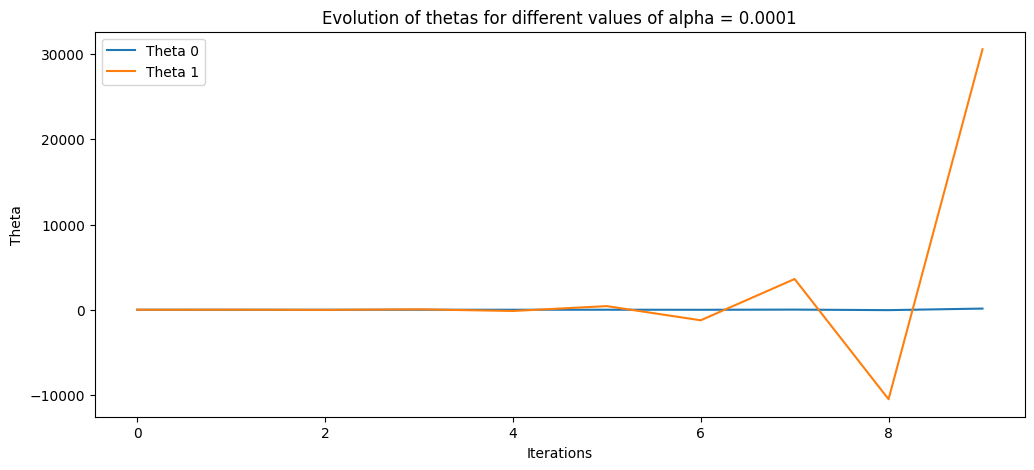

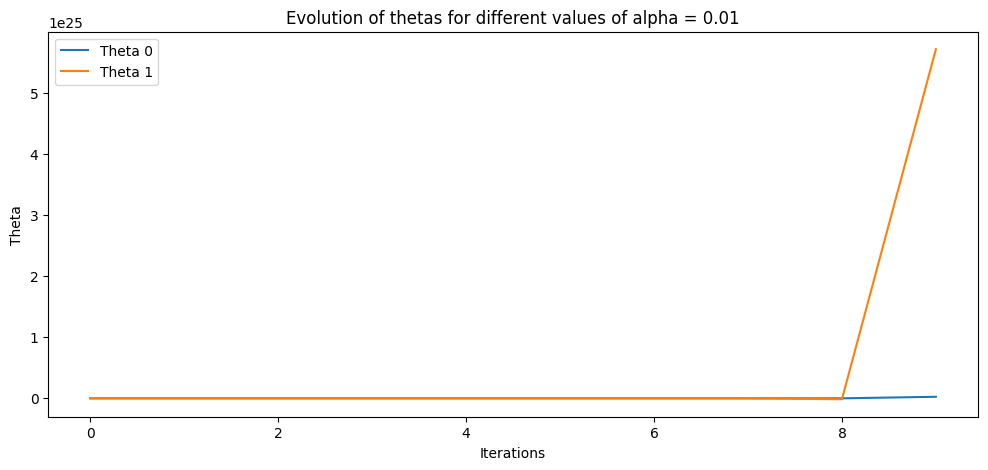

In [163]:

df_study_2 = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
df_study_2 = df_study_2[["Adult_mortality","Life_expectancy"]]


def least_squares(df):
    x = df.Adult_mortality
    y = df.Life_expectancy
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_diff = y - y_mean
    x_diff_sq = x_diff**2
    x_diff_y_diff = x_diff*y_diff
    b = np.sum(x_diff_y_diff)/np.sum(x_diff_sq)
    a = y_mean - b*x_mean
    return a, b

a, b = least_squares(df_study_2)
print("a: ", a)
print("b: ", b)



plt.scatter(df_study_2.Adult_mortality,df_study_2.Life_expectancy)
plt.plot(df_study_2.Adult_mortality, a + b*df_study_2.Adult_mortality, color='red')
plt.show()

#Define a similat gradient descent algorithm for this new dataset
x = df_study_2.Adult_mortality
y = df_study_2.Life_expectancy
x = np.c_[np.ones(x.shape[0]), x]


theta = np.array([0, 1])
alpha = 0.01
iters = 10




thetaList_00001 = gradDescent(x, y, theta, 0.0001, iters)
thetaList_001 = gradDescent(x, y, theta, 0.01, iters)
thetaList_1 = gradDescent(x, y, theta, 1, iters)



plt.figure(figsize=(12,5))
plt.plot(thetaList_1)
plt.title("Evolution of thetas for different values of alpha = 1")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])


plt.figure(figsize=(12,5))
plt.plot(thetaList_00001)
plt.title("Evolution of thetas for different values of alpha = 0.0001")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])


plt.figure(figsize=(12,5))
plt.plot(thetaList_001)
plt.title("Evolution of thetas for different values of alpha = 0.01")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])






## STEP 4: Multivariate regression

**TO DO 4.1**

Execute the following cells

In [110]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

alphas = 10**np.linspace(10,-2,100)*0.5

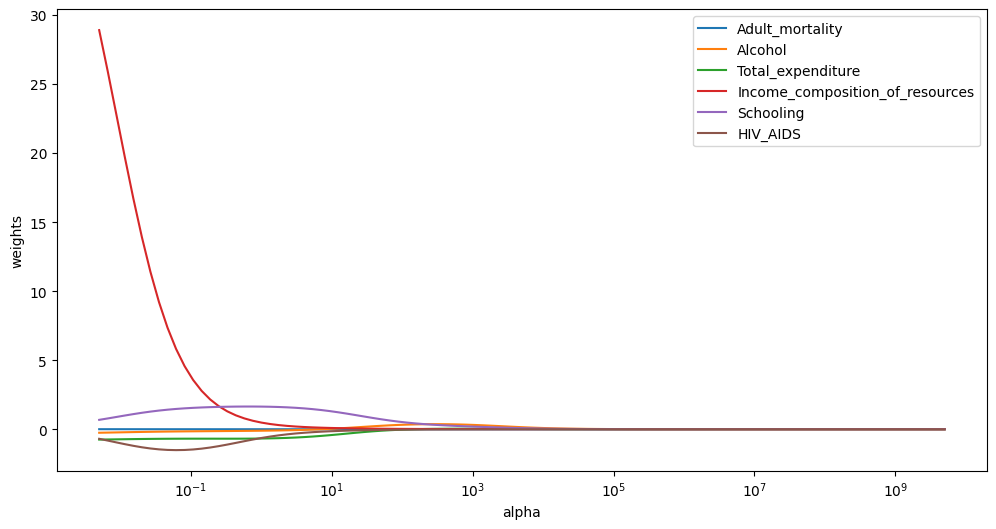

,Schooling,Income_composition_of_resources,Total_expenditure,Adult_mortality
count,54.000000,54.000000,54.000000,54.000000
mean,12.940741,0.660833,5.531481,173.666667
std,2.935117,0.133925,1.094993,95.493356
min,8.300000,0.457000,3.400000,2.000000
25%,10.200000,0.520000,4.507500,63.250000
50%,13.750000,0.691000,5.610000,218.000000
75%,15.675000,0.790750,6.467500,247.000000
max,16.800000,0.841000,7.900000,271.000000


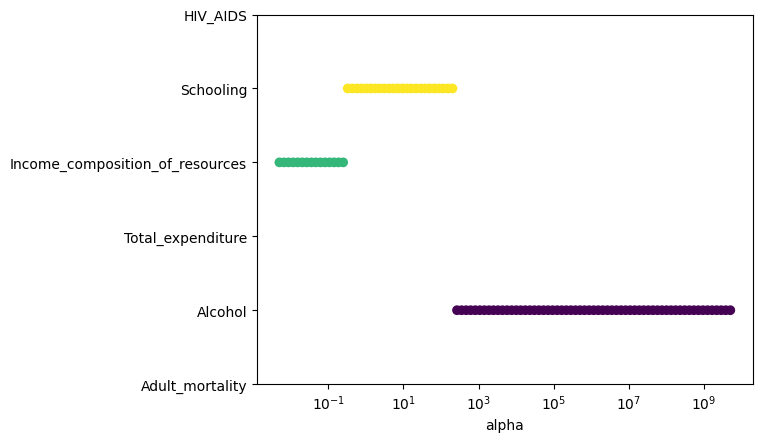

In [111]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.show()

df_study[['Schooling', 'Income_composition_of_resources']].describe()


coefs_reversed = coefs[::-1]

#print the index of the maximun element for each c in coef_reversed

indexes = []
for c in coefs_reversed:
    indexes.append(np.argmax(c)+1)

plt.scatter(alphas[::-1],indexes, c= indexes)
plt.yticks(range(1,7), ['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.xscale('log')
plt.xlabel('alpha')


df_study[['Schooling', 'Income_composition_of_resources','Total_expenditure', 'Adult_mortality']].describe()
 

**QUESTION 10**

How do you interpret the plot?

**QUESTION 11**

Is it normal that the l2 diminishes with alpha increasing?

**QUESTION 12**

Which is the most relevant variable for Ridge? Prove and justify your response in the following cell

**TO DO 4.2**

Execute the following cell

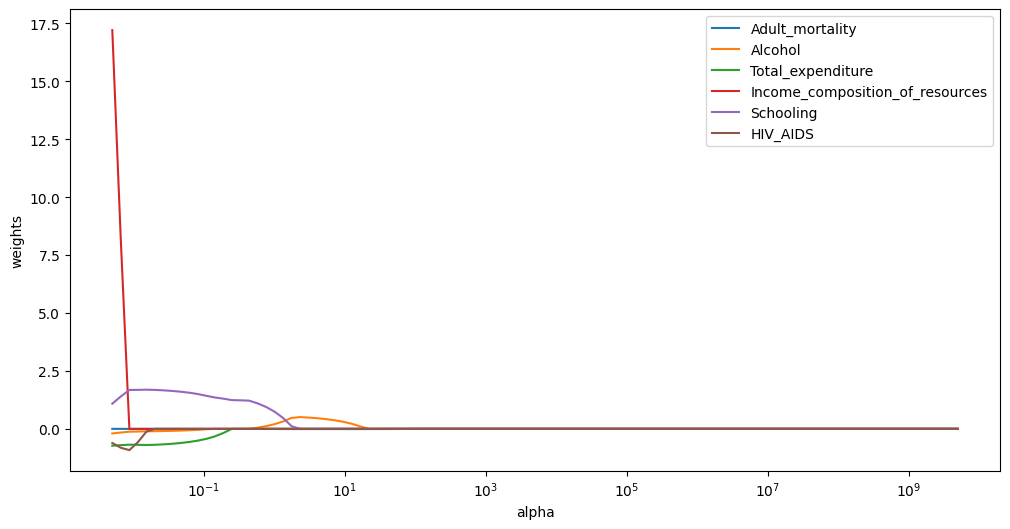

In [112]:
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(["Adult_mortality", "Alcohol", "Total_expenditure", "Income_composition_of_resources", "Schooling", "HIV_AIDS"])
plt.show()

**QUESTION 13**

Which is the most relevant variable for Lasso? Prove and justify your response in the following cell

**QUESTION 14**

What is the main difference between Ridge and Lasso regression? For this setup, which is the prefered method to use? Justify your response

** TO CODE 4.3 **

Following the previous examples, use a sklearn function to compute a multivariable least square method. Compare the coefficients obtained by the different methods.

**TO CODE 4.4 **

Dealing with too many variables can sometimes be counter-productive and it can be more interesting to remove some features. One way to evaluate the importance of each variable is to compute the f_test whose function is named f_regression in sklearn.

**QUESTION 15**

According to the f_test, rank each variable from the least to the most promising. Compare it with the correlation of your subset.